# Simulating Chuck a Luck

## "Pay a Buck and Chuck-a-Luck" 

[Chuck-a-Luck](https://en.wikipedia.org/wiki/Chuck-a-luck) is a game of chance often associated with charity fundraisers or street gambling rather than casinos. 

To play, the House says, "Pay \\$1, pick a number and roll 3 dice. If any of those dice come up, you'll win \\$1, \\$2, or \\$3". 

> "It's even odds", they say, "because the probability of rolling your number is 1/6 and you get to roll 3 dice! 1/6 + 1/6 + 1/6 is 3/6 which is 1/2". 

You know better than this, so it's time to make an experiment to approximate the actual risk and payoff...

Rules:
- The player pays \\$1 to play and picks a number.
- The House rolls 3 dice at once.

- Payouts:
  - \\$3 if all three dice match the chosen number
  - \\$2 if exactly two dice match the chosen number
  - \\$1 is exactly one of the dice matches the chosen number
  - If none of the dice match the player's chosen number, then the House keeps the \\$1.

Exercises:
- What are your chances of getting an outcome payout of \\$2? (where we earned \\$3 on the \\$1 ante)
- What are your chances of getting an payout of \\$1?
- What are your chances of getting a payout of $0 where you ante \\$1 and win \\$1?
- What are your chances of getting a payout of -\\$1 where you ante up, but don't win anything?
- What is the average cost/gain per game? (think of averaging the total payout calculation across all simulations)

- Chart out a histogram of all the outcomes of those 1,000,000 games
- Is this really a fair game of 1/6 + 1/6 + 1/6 odds?
- If you play 1,000,000 games in a row, what are your winnings/losses?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def chuckaluck(n_sims=10_000):
    n_simulations = n_sims # number of times to play the game
    n_trials = 3           # number of dice rolled 
    choice = 1             # number the player chooses


    results = pd.DataFrame(np.random.choice([1,2,3,4,5,6], 
                                            size=(n_simulations * n_trials)).reshape(n_simulations, n_trials))

    return results.apply(lambda row: sum([1 for elem in row.values if elem == 1]), axis=1)
    
bet = 1   # amount wagered each game
win = 1   # amount won for each dice that matches `choice`

#### What are your chances of getting an outcome payout of 2 dollars (where we earned 3 dollars on the 1 dollar ante)?


In [3]:
results = chuckaluck()
payout = results * win - bet
(payout == 2).mean()

0.0038

In [4]:
# as one line of code:
((chuckaluck() * win - bet) == 2).mean()

0.0045

#### What are your chances of getting an payout of $1?


In [5]:
((chuckaluck() * win - bet) == 1).mean()

0.0662

#### What are your chances of getting a payout of 0, where you ante 1 and win 1?


In [6]:
((chuckaluck() * win - bet) == 0).mean()

0.3513

#### What are your chances of getting a payout of -1, where you ante up, but don't win anything?


In [7]:
((chuckaluck() * win - bet) == -1).mean()

0.5749

#### What is the average cost/gain per game? (think of averaging the total payout calculation across all simulations)


In [8]:
expected_payout = (chuckaluck() * win - bet).mean()
expected_payout

-0.5006

####  If you play 1,000,000 games in a row, what are your winnings/losses?


In [9]:
payout = (chuckaluck(n_sims=1_000_000) * win - bet).sum()
payout

-499871

#### Chart out a histogram of all the outcomes of those 1,000,000 games


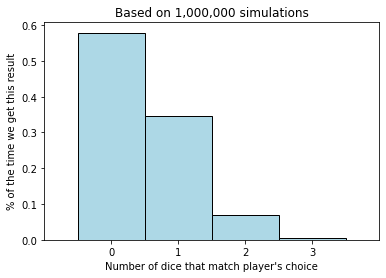

In [10]:
# Histogram for number of times player's choice shows up on the dice

n_simulations = 1_000_000
chuckaluck1 = chuckaluck(n_sims=n_simulations)

freq, bins = np.histogram(chuckaluck1, bins=range(5))
freq = freq / freq.sum() # raw number -> percent
plt.bar(bins[:-1], freq, width=1, color='lightblue', edgecolor='black')
# plt.bar(bins[-8:-1], freq[-7:], width=1, color='lightblue', edgecolor='black')

plt.xticks(range(4))
plt.ylabel('% of the time we get this result')
plt.xlabel('Number of dice that match player\'s choice')

num_rolls = '{:,}'.format(len(chuckaluck1))
plt.title(f'Based on {num_rolls} simulations')
plt.xlim(-1, 4)
plt.show()

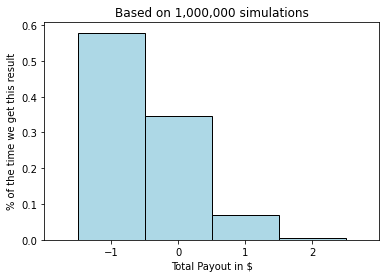

In [11]:
# Histogram for the payout of each game

n_simulations = 1_000_000

payout = (chuckaluck(n_sims=n_simulations) * win - bet)

freq, bins = np.histogram(payout, bins=range(-1,4))
freq = freq / freq.sum() # raw number -> percent
plt.bar(bins[:-1], freq, width=1, color='lightblue', edgecolor='black')
# plt.bar(bins[-8:-1], freq[-7:], width=1, color='lightblue', edgecolor='black')

plt.xticks(range(-1,3))
plt.ylabel('% of the time we get this result')
plt.xlabel('Total Payout in $')

num_rolls = '{:,}'.format(len(payout))
plt.title(f'Based on {num_rolls} simulations')
plt.xlim(-2, 3)
plt.show()

#### Is this really a fair game of 1/6 + 1/6 + 1/6 odds?


No. As demonstrated above, your expected payout of each game is a loss of approximately 0.50. If it were even odds, the expected payout would be 0. 

Additionally, the odds of at least one die matching the player's choice can be calculated like so:

In [12]:
1 - (5/6)**3

0.42129629629629617

Since this is less than .5, we know this game does not have even odds